# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

<font color='red'>\# TODO: fill in the below</font>

- [Shikhar, Goyal]
- [20244860]
- [Section 1]
- [Whaledone]
- [11/Dec/2021]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [2]:
import datetime
import pandas as pd
import numpy as np

In [3]:
print(datetime.datetime.now())

2021-12-11 03:17:04.479363


In [4]:
!which python

/usr/local/bin/python


In [5]:
!python --version

Python 3.7.12


In [6]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

SyntaxError: ignored

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
df1 = df

## 1.1: Clustering Algorithm #1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Creating object for Standard Scaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)
df1

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

In [ ]:
#Creating KMeans Clustering Model
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++",
                 n_clusters = 4,
                 n_init = 150,
                 random_state = 16)
k_means.fit(df1)
              

KMeans(n_clusters=4, n_init=150, random_state=16)

In [ ]:
labels = k_means.labels_

In [ ]:
k_means.cluster_centers_

array([[ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-0.72276928,  0.89502598, -0.90658925,  0.62188649],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636]])

In [ ]:
output = scaler.inverse_transform(k_means.cluster_centers_)
output

array([[5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03]])

In [ ]:
df2 = pd.DataFrame(data = output,columns=["Age","Income","SpendingScore","Savings"])
df2

,Age,Income,SpendingScore,Savings
0,59.955414,72448.063694,0.771518,6889.972190
1,87.775510,27866.102041,0.328800,16659.261445
2,41.589404,107695.980132,0.269935,14937.265769
3,24.180000,128029.120000,0.896892,4087.520309


In [ ]:
#Evaluating the performance of the model using Calinski-Harabasz score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabasz_score(df1,labels)

1611.2647365421865

In [ ]:
#Evaluating the performance of the model using Silhoutte measure
from sklearn.metrics import silhouette_score,silhouette_samples

In [ ]:
#Performing internal validation by looking at the clusters inertia
k_means.inertia_

189.70178796659565

In [ ]:
#Getting the Silhouette Score
silhouette_score(df1,k_means.labels_)

0.7581191889903789

In [ ]:
#Determining best K value by using ELbow Method
inertias = {}
silhouettes = {}
for k in range(2,8):
  kmeans = KMeans(n_clusters = k, random_state =16).fit(df1)
  inertias[k] = kmeans.inertia_
  silhouettes[k] = silhouette_score(df1,kmeans.labels_,metric = 'euclidean')

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Silouette')

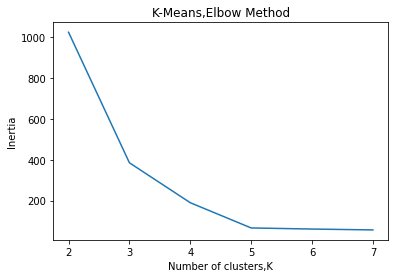

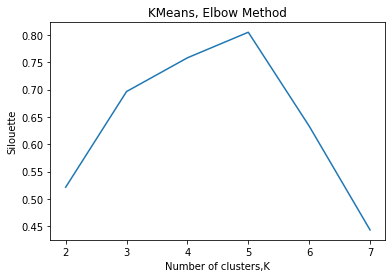

In [ ]:
plt.figure();
plt.plot(list(inertias.keys()),list(inertias.values()));
plt.title('K-Means,Elbow Method')
plt.xlabel("Number of clusters,K");
plt.ylabel("Inertia");

plt.figure();
plt.plot(list(silhouettes.keys()),list(silhouettes.values()));
plt.title('KMeans, Elbow Method')
plt.xlabel("Number of clusters,K");
plt.ylabel("Silouette")

The optimal value of K determined by Elbow method is 5

### KMeans Cluster with 5 clusters





In [ ]:
#Clustering the data using K = 5
k_mean2 = KMeans(init = "k-means++",
                 n_clusters = 5,
                 n_init = 150,
                 random_state = 16)

In [ ]:
#fitting the KMean to the dataset
k_mean2 = k_mean2.fit(df1)

In [ ]:
#Creating object for Labels
labels2 = k_mean2.labels_
labels2

array([0, 0, 0, 0, 1, 3, 0, 1, 1, 1, 4, 2, 2, 2, 0, 4, 0, 1, 1, 4, 2, 4,
       0, 1, 4, 3, 3, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 3, 0,
       0, 3, 4, 3, 2, 0, 1, 2, 3, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 3, 3, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 3, 0, 4, 0, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 3, 1, 0, 3, 2, 0, 0, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 0, 2, 3, 1, 2, 1, 1, 1, 2, 4, 0, 1, 0, 0, 2, 0,
       2, 0, 3, 1, 4, 3, 0, 2, 1, 0, 0, 3, 0, 3, 0, 4, 0, 1, 0, 2, 1, 0,
       1, 4, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 3, 2,
       1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 3, 0, 1, 1, 1, 1, 0, 1, 2, 3, 2, 1,
       0, 0, 2, 1, 2, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 3, 0,
       0, 0, 4, 0, 2, 1, 3, 3, 3, 1, 0, 2, 1, 1, 2, 2, 0, 0, 4, 0, 0, 1,
       0, 1, 2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 4, 2, 1,
       1, 2, 4, 1, 1, 3, 0, 2, 2, 0, 2, 1, 1, 2, 0,

In [ ]:
#Inverse transformation from Scaled values
output2 = scaler.inverse_transform(k_mean2.cluster_centers_)
output2

array([[5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

In [ ]:
#Creating a dataframe of the new output
df3 = pd.DataFrame(output2,columns=["Age","Income","SpendingScore","Savings"])
df3

,Age,Income,SpendingScore,Savings
0,59.955414,72448.063694,0.771518,6889.972190
1,87.775510,27866.102041,0.328800,16659.261445
2,32.777778,105265.809524,0.309926,14962.778066
3,24.180000,128029.120000,0.896892,4087.520309
4,86.000000,119944.040000,0.068378,14808.683793


In [ ]:
#Performing internal validation by looking at the clusters inertia
k_mean2.inertia_

66.5111137485908

In [ ]:
#Getting the Silhouette Score
silhouette_score(df1,k_mean2.labels_)

0.8048976287755765

ROC_AUC score improved to 0.8048 from 0.75 when using the optimal number of K=5

## 1.2: Clustering Algorithm #2

1. Looking at the data
2. Scaling the dataset
3. Building DBSCAN Model using random variable values

In [ ]:
#Looking at the data
df

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
...,...,...,...,...
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445


In [ ]:
#Scaling the dataset
#The data is standardized and is stored in a new object called df4
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
df4 = scaled.fit_transform(df)
df4

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan.fit(df4)

DBSCAN()

In [ ]:
dbscan.labels_

array([0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 4, 4, 4, 0, 3, 0, 1, 1, 3, 4, 3,
       0, 1, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 4, 0, 1, 2, 0,
       0, 2, 3, 2, 4, 0, 1, 4, 2, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 4, 1, 1, 4, 0, 4, 0, 0, 2, 0, 3, 0, 1, 1, 4, 4, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 4, 0, 0, 4, 4, 2, 4, 2, 4, 1, 1, 4, 4, 0,
       1, 4, 0, 4, 4, 4, 0, 4, 2, 1, 4, 1, 1, 1, 4, 3, 0, 1, 0, 0, 4, 0,
       4, 0, 2, 1, 3, 2, 0, 4, 1, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 4, 1, 0,
       1, 3, 4, 0, 1, 0, 4, 1, 0, 4, 1, 4, 1, 0, 4, 0, 1, 0, 4, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 4, 2, 2, 1, 4, 0, 0, 0, 4, 1, 0, 0, 0, 1, 2, 4,
       1, 1, 1, 4, 0, 4, 0, 4, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 2, 4, 1,
       0, 0, 4, 1, 4, 2, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 4, 4, 2, 0,
       0, 0, 3, 0, 4, 1, 2, 2, 2, 1, 0, 4, 1, 1, 4, 4, 0, 0, 3, 0, 0, 1,
       0, 1, 4, 2, 0, 4, 1, 0, 1, 1, 4, 0, 1, 1, 0, 0, 1, 4, 4, 3, 4, 1,
       1, 4, 3, 1, 1, 2, 0, 4, 4, 0, 4, 1, 1, 4, 0,

In [ ]:
#getting the silhoutte score
silhouette_score(df4,dbscan.labels_)

0.8048976287755765

In [ ]:
#DBSCAN Hyperparamter Tuning for Eps and Min_Sample values
#We will use Elbow method to plot silhoutte score

silh = {}

epss = np.arange(0.1,0.9,0.1)
minss = [4,5,6,7,8,9]

ss = np.zeros((len(epss),len(minss)))

for i,eps in enumerate(epss):
  for j, mins in enumerate(minss):
    db =DBSCAN(eps = eps, min_samples = mins).fit(df4)
    if len(set(db.labels_))==1:
      ss[i,j] = -1
    else:
      ss[i,j] = silhouette_score(df4,db.labels_,metric='euclidean')

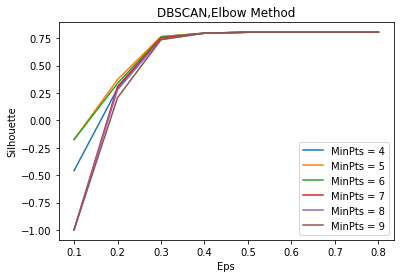

In [ ]:
plt.figure()
for i in range(len(minss)):
  plt.plot(epss,ss[:,i], label = "MinPts = {}".format(minss[i]));

plt.title('DBSCAN,Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();


From the above hypertuning, I observe that the optimum value for eps and min are 0.5 and 8 respectively. I will create another DBSCAN model and will check its silhouette score.

In [ ]:
#Creating another DBSCAN model
dbscan2 =DBSCAN(eps = 0.5,min_samples=8)
dbscan2.fit(df4)

DBSCAN(min_samples=8)

In [ ]:
dbscan2.labels_

array([0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 4, 4, 4, 0, 3, 0, 1, 1, 3, 4, 3,
       0, 1, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 4, 0, 1, 2, 0,
       0, 2, 3, 2, 4, 0, 1, 4, 2, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 4, 1, 1, 4, 0, 4, 0, 0, 2, 0, 3, 0, 1, 1, 4, 4, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 4, 0, 0, 4, 4, 2, 4, 2, 4, 1, 1, 4, 4, 0,
       1, 4, 0, 4, 4, 4, 0, 4, 2, 1, 4, 1, 1, 1, 4, 3, 0, 1, 0, 0, 4, 0,
       4, 0, 2, 1, 3, 2, 0, 4, 1, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 4, 1, 0,
       1, 3, 4, 0, 1, 0, 4, 1, 0, 4, 1, 4, 1, 0, 4, 0, 1, 0, 4, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 4, 2, 2, 1, 4, 0, 0, 0, 4, 1, 0, 0, 0, 1, 2, 4,
       1, 1, 1, 4, 0, 4, 0, 4, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 2, 4, 1,
       0, 0, 4, 1, 4, 2, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 4, 4, 2, 0,
       0, 0, 3, 0, 4, 1, 2, 2, 2, 1, 0, 4, 1, 1, 4, 4, 0, 0, 3, 0, 0, 1,
       0, 1, 4, 2, 0, 4, 1, 0, 1, 1, 4, 0, 1, 1, 0, 0, 1, 4, 4, 3, 4, 1,
       1, 4, 3, 1, 1, 2, 0, 4, 4, 0, 4, 1, 1, 4, 0,

In [ ]:
silhouette_score(df4,dbscan2.labels_)

0.8048976287755765

## 1.3 Model Comparison

I made KMeans and DBSCAN technique for this clustering problem.Though the silhoutte score (0.8049) for both DBSCAN model and KMeans model is (0.804),I consider KMeans to be a better solution for this type of problem. The reason are as follows:

1.   The number of clusters to be made in KMeans can be hyper tuned easily. I used Elbow method to determine the optimum K value which came out to be 5. And it is also easily understandable by looking at the data that there will be 5 clusters as there are people belonging to different age groups. In DBSCAN, it is hard to determine the parameters Eps and Min_sample which can be intuitively associated with the data.
2.   Another reason for preferring KMeans over DBSCAN is the interpretability of the clusters. KMeans gives a mean point for each cluster that can be used for labelling, while DBSCAN is more for density clustering and determinign outliers, our problem dataset does not have any outlier or density problem.



## 1.4 Personas

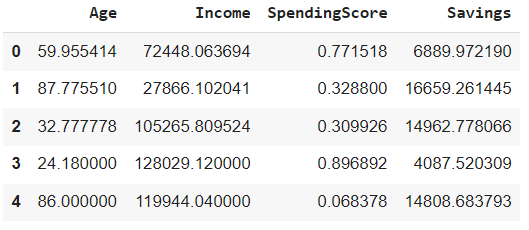

Based on KMeans clustering interpretation, we have four personas as the customer to the jewellery store:

1.   **Cluster 0: Spendthrift Seniors:** These are customers whose mean age is around 60. Their income is not too high and not too less, but they spend good amount of money at the Jewellery shop. These customers in general must be purchasing jewellery for their children's marriages or functions. They are not too much into savings.
2. **Cluster 1: Pensioners and Savers:** These are customers in their 80s or 90s. These people are out of jobs and mostly living on pensions or dependent on their family. They are not very mobile as a result they donot get much opportunity to visit the store and spend. Their families are settled and they donot have much need for jewellery for themselves now. The entire income goes into savings as a result they have a strong bank account.
3.   **Cluster 2: Middle-age responsible population:** These are in their 30s. These customers have all the liabilities ahead of them, they are earning well but their focus is more towards savings. Their spend score is very low as they might be spending on jewellery only when it is required and necessary otherwise these customer's main focus is to save for the big liabilities ahead of them.
4.   **Cluster 3: Fresh Workers:** These are young customers. They must have recently started earning and they earn a good amount of money. They don't have any liability and they believe in enjoying the youth as a result their savings is the lowest in the entire group. The speding score is also high for this bracket, as these customers must be purchasing jewellery for luxury.
5.   **Cluster 3:Rich No Jewellery Oldies:** These are also old customers around 90s. They have a very good income but they don't believe in spending at all at the jewellery store. These customers are no stingy, as their savings is only 12% of their income, this means they spend good amount of their income but not too much on the Jewellery at Uncle Steve's store.






# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

The rule {Cereals} -> {Coffee}

Cereals and Coffee has a high support as they exist together in many transactions. They also have high confidence because out of all the transactions that involve Cereals, most of them also includes Coffee.  Cereals and Coffee are common breakfast consumption. When customer come to purchase Cereals they also tend to purchase coffee. Uncle Steve will find it interesting because from this rule, he can rearrange the store shelves in such a way that breakfast products are kept in vicinity to each other. This way when a customer is looking for breakfast snacks and food, they can get everything at one place.



## 2.2: A rule that might have reasonably high support but low confidence.

Answer: The rule {butter} -> {cheese} would have high support for cheese and low confidence for butter & vheese. Both items consumes fast and should be on consumer's weekly shopping list. This will not be interesting to Uncle Steve because when he looks at the transaction then 90% of the transaction already includes cheese, so associating Cheese with Butter will not make much sense to him. What he would be interested in is the lift so as to understand whether the association between butter and cheese is just a random chance or not.

## 2.3: A rule that might have low support and low confidence.

The rule {Milk} -> {Washing Detergent}

Very few of the transactions where Milk exists, also includes Washing Detergent. The rational behind low support and low confidence is that customers purchase milk at regular intervals, while the washing detergent is something they pruchase mostly at the beginning of the month to cater to the entire months need. Uncle Steve would likely not find this rule interesting as it can be understood intuitively. Both the products are from different category and with different intensity of consumption.

## 2.4: A rule that might have low support and high confidence.

The rule {Cakes} -> {Flowers}

This rule has low support as the number of instances where Cake and Flower transaction takes place together is less compared to the overall transactions in the dataset. But this rule has a high confidence, as in the total number of transaction where Cake was purchased, customers also purchased flowers. This can be due to the reason that Cakes are generally purchased by people to celebrate an occassion, which is not always, but when they do they also tend to purchase flowers to complement that cake. Uncle Steve will find it interesting as it tells how flowers sale can be increased along with the sales of cakes. Good,Tasty cake counter near beautiful colorful flower section can really improve the sales in both the categories.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
dtf = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
dtf.info()

from sklearn.model_selection import train_test_split

X = dtf.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = dtf['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [ ]:
#Printing the top 2 rows of the dataset
dtf.head(2)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,BadCredit,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,0,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,0,3235,0,12,Lake Debra,NewCar,1978-06-02


## 3.1: Baseline model

In [ ]:
#Checking the unique values in the field city
X_train['City'].unique()

array(['New Roberttown', 'Ericmouth', 'East Jill', 'Lake Debra',
       'North Judithbury', 'Lisatown', 'West Michael', 'East Jessetown',
       'Port Jesseville', 'Robinsonshire', 'Lake Chad', 'Ramirezstad',
       'Herrerafurt', 'North Noahstad', 'Lake Roberto', 'New Kellystad',
       'Cassandraton', 'New Jessica', 'Jacquelineland', 'Port Keith'],
      dtype=object)

In [ ]:
#Making a copy of training dataset
X_train_copy = X_train

In [ ]:
#Dropping 'UserID', 'FirstName','LastName','Street','LicensePlate'
X_train.drop(['UserID','FirstName','LastName','Street','LicensePlate','DateOfBirth'],axis=1,inplace=True)

In [ ]:
#Checking the New Training Data with dropped columns
X_train.dtypes

Sex                  object
PreviousDefault       int64
NumberPets            int64
PreviousAccounts      int64
ResidenceDuration     int64
Amount                int64
Married               int64
Duration              int64
City                 object
Purpose              object
dtype: object

In [ ]:
#Encoding Variables: Sex,City and Purpose with Ordinal encoding
#Importing the package
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Encoding the two variables
encoder = OrdinalEncoder()

In [ ]:
#Fitting the encoding
X_train[["Sex","City","Purpose"]] = encoder.fit_transform(X_train[["Sex","City","Purpose"]])
X_test[["Sex","City","Purpose"]] = encoder.fit_transform(X_test[["Sex","City","Purpose"]])

In [ ]:
#Checking the datatypes of before creating Decision Tree Classifier model
X_train.dtypes

Sex                  float64
PreviousDefault        int64
NumberPets             int64
PreviousAccounts       int64
ResidenceDuration      int64
Amount                 int64
Married                int64
Duration               int64
City                 float64
Purpose              float64
dtype: object

In [ ]:
#Creating Decision Tree without making any changes to the data at this point of time
#Importing the required package
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Creating the Decision Tree using Gini Index
decisiontree = DecisionTreeClassifier(criterion='entropy',random_state=16)

In [ ]:
#Fitting the Decision Tree model to the training Dataset
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=16)

In [ ]:
#Evaluating the performance of Decision Tree Model using K Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(shuffle =True,n_splits = 10)
cv_results = cross_val_score(decisiontree,X_train,y_train,cv = kf,scoring = 'roc_auc').mean()


In [ ]:
cv_results

0.621650029122591

## 3.2: Feature engineering

In [117]:
# PLEASE RUN THIS CELL BEFORE CONTINUING TO THE REST OF THE CODING

# First, we'll read the provided labeled training data
dtf = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
dtf.info()

from sklearn.model_selection import train_test_split

X = dtf.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = dtf['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


**1. Data Balancing**

In [118]:
#Checking the balancing of the dataset
y_train.value_counts()

0    3976
1     824
Name: BadCredit, dtype: int64

In [119]:
#Oversampling the dataset using the RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_resampled,y_resampled = ros.fit_resample(X_train,y_train)
X_resampled.shape
y_resampled.shape
np.bincount(y_resampled)

array([3976, 3976])

In [120]:
X_resampled.head(2)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
0,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
1,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19


I tried running the entire model after balancing the data, but it resulted in overfitting. My ROC_AUC on Training data improved till 95%, but when I ran the model on the Testing data, it came out to be 72%. Therefore, I continued without balancing the data.

**2. Creating a new column 'Age'**

In [121]:
#Importing Datetime package for Date Of Birth field transformation
import datetime as dt

In [122]:
#Instead of removing 'DateOfBirth' field, I will pull the year portion of the date in a column
X_train[['DateOfBirth']] = pd.to_datetime(X_train['DateOfBirth'])

In [123]:
X_train[['Year']] = X_train['DateOfBirth'].dt.year

#df['Month'] = df['Date'].dt.month

In [124]:
X_train.head(2)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth,Year
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22,1970
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19,1964


In [125]:
#We will create another calculated column 'Age', as the data is fairly new, we will subtract Today's Date with the Date of Birth to get the required results
from datetime import date

def calculate_age(born):
  today = datetime.date.today()
  return today.year - born.year - ((today.month,today.day)<(born.month,born.day)) 


In [126]:
#Creating the field 'Age'
X_train['age'] = X_train['DateOfBirth'].apply(calculate_age)

In [127]:
X_train.head(2)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth,Year,age
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22,1970,51
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19,1964,57


**3.Applying Ordinal Encoding for the categorical features**

In [129]:
#Ordinal Encoding the entire dataset
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train[["UserID","Sex","FirstName","LastName","Street","LicensePlate","City","Purpose"]] = enc.fit_transform(X_train[["UserID","Sex","FirstName","LastName","Street","LicensePlate","City","Purpose"]] )

In [130]:
X_train.dtypes

UserID                      float64
Sex                         float64
PreviousDefault               int64
FirstName                   float64
LastName                    float64
NumberPets                    int64
PreviousAccounts              int64
ResidenceDuration             int64
Street                      float64
LicensePlate                float64
Amount                        int64
Married                       int64
Duration                      int64
City                        float64
Purpose                     float64
DateOfBirth          datetime64[ns]
Year                          int64
age                           int64
dtype: object

In [131]:
#Dropinng Date of Birth field from the dataset
X_train.drop(['DateOfBirth'],axis=1,inplace=True)

In [132]:
#Building the Decision Tree Classifier on the above dataset
from sklearn.tree import DecisionTreeClassifier

In [133]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=16)

In [134]:
#fitting the model into data
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=16)

In [135]:
#Evaluating the performance of the model using ROC AUC Metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf2 = KFold(shuffle = True,n_splits = 10)
cv_results2 = cross_val_score(dt,X_train,y_train,cv = kf2, scoring ='roc_auc').mean()
cv_results2

0.7000262556509577

When comparing the model created after feature engineering, it is observed that the model performance has improved compared to the baseline models performance

## 3.3: Feature selection

Feature selection is being done using Recursive Feature Selection using Cross Validation

In [136]:
#Importing the required package
from sklearn.feature_selection import RFECV,mutual_info_classif


In [137]:
#Fitting the Recursive Feature Selection based on the ROC AUC Score of the model
fs = RFECV(dt,scoring='roc_auc')

In [138]:
fs.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


RFECV(estimator=DecisionTreeClassifier(criterion='entropy', random_state=16),
      scoring='roc_auc')

In [139]:
print('Optimal number of features',fs.n_features_)
print('Best Features are:',X_train.columns[fs.support_])

Optimal number of features 6
Best Features are: Index(['UserID', 'FirstName', 'LastName', 'LicensePlate', 'Amount', 'Year'], dtype='object')


The output of RFECV was not very satisfactory, it selected the variables which were not very intuitive, therefore, I will try another feature selection method.

In [140]:
#Trying another feature selection method as the above one did not give any proper result.
#This time i will be using mutual information classification for Feature Selection
ms = mutual_info_classif(X_train,y_train,discrete_features='auto',n_neighbors=3)

In [141]:
#Determine the columns and their scores
high_score_feature = []
for score, f_name in sorted(zip(ms,X_train.columns),reverse= True):
  print(f_name,score)
  high_score_feature.append(f_name)

col = X_train[high_score_feature]
print(col.columns)

Year 0.13178083897110127
age 0.1267697015303224
Amount 0.11321961533260416
Duration 0.007359661941878093
City 0.006151416668504162
UserID 0.005521825602450292
FirstName 0.004740428989970624
Street 0.004281709002346368
LastName 0.00369441367076373
Sex 0.002263310205391056
PreviousDefault 0.0019026915972448766
ResidenceDuration 0.0018124819811271564
Purpose 0.0
PreviousAccounts 0.0
NumberPets 0.0
Married 0.0
LicensePlate 0.0
Index(['Year', 'age', 'Amount', 'Duration', 'City', 'UserID', 'FirstName',
       'Street', 'LastName', 'Sex', 'PreviousDefault', 'ResidenceDuration',
       'Purpose', 'PreviousAccounts', 'NumberPets', 'Married', 'LicensePlate'],
      dtype='object')


The above scores for the features from Mutal_Info_Classification method is more intuitive. For the purpose of the model, I will consider the Top 6 features and also Previous Accounts. I believe that the number of accounts that a person holds does play a role whether a person will default or not.

In [142]:
#Dropping the features from the model that we donot need
X_train.drop(['Duration', 'Street', 'UserID', 'PreviousAccounts',
       'Purpose', 'FirstName', 'NumberPets', 'LicensePlate', 'LastName',
       'City'], axis = 1,inplace = True)
X_train.head(2)

,Sex,PreviousDefault,ResidenceDuration,Amount,Married,Year,age
3897,1.0,0,2,3329,0,1970,51
5628,0.0,0,2,2996,0,1964,57


In [143]:
#Again creating a Decision Tree mode
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion='entropy',random_state=16)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=16)

In [144]:
#Evaluating the performance of the model using ROC AUC Metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf3 = KFold(shuffle = True,n_splits = 10)
cv_results3 = cross_val_score(dt2,X_train,y_train,cv = kf2, scoring ='roc_auc').mean()
cv_results3

0.715958145297179

After feature selection, the Decision Tree gave even better results compared to the model we got in Step 2

## 3.4: Hyperparameter tuning

In [145]:
#Hyperparameter tuning for Decision Tree Model
#Creating a List of parameters to be tuned. For Decision Tree, we will tune Criterion,Max_depth,Max_leaf_nodes,Min_samples_leaf & Min_samples_split
params = {
    'criterion':('gini','entropy'),
    'max_depth':[2,10,50,100,200],
    'min_samples_split':[2,3,4,5],
    }

In [146]:
#Importing the required package for GridSearchCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dt2,params,cv = 5,scoring = 'roc_auc')

In [147]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=16),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 10, 50, 100, 200],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='roc_auc')

In [148]:
#Getting the model score with the best hyperparameters
grid.best_score_

0.8697045435916749

In [149]:
#The best parameters determined by Cross Validation
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}

## 3.5: Performance estimation

**Transforming the Test Dataset as per the Training**

In [150]:
#1.Creating Age Column in the Test Dataset
X_test[['DateOfBirth']] = pd.to_datetime(X_test['DateOfBirth'])
X_test[['Year']] = X_test['DateOfBirth'].dt.year
X_test['age'] = X_test['DateOfBirth'].apply(calculate_age)

In [151]:
X_test.head(2)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth,Year,age
1782,435-05-4551,F,0,Tanya,Conner,1,1,3,4508 Crystal Rue Suite 173,HCY 571,3773,0,36,North Judithbury,NewCar,1970-10-15,1970,51
3917,541-06-3756,F,0,Tammy,Brennan,0,0,3,6932 Stevenson Falls Suite 044,52A TE2,3412,0,24,Lake Roberto,UsedCar,1963-09-01,1963,58


In [153]:
#2.Ordinal Encoding the entire dataset
X_test[["UserID","Sex","FirstName","LastName","Street","LicensePlate","City","Purpose"]] = enc.fit_transform(X_test[["UserID","Sex","FirstName","LastName","Street","LicensePlate","City","Purpose"]] )

In [154]:
#3.Removing features which are not important
X_test.drop(['Duration', 'Street', 'UserID', 'PreviousAccounts',
       'Purpose', 'FirstName', 'NumberPets', 'LicensePlate', 'LastName',
       'City'], axis = 1,inplace = True)
X_test.drop(['DateOfBirth'], axis = 1,inplace = True)

X_test.head(2)

,Sex,PreviousDefault,ResidenceDuration,Amount,Married,Year,age
1782,0.0,0,3,3773,0,1970,51
3917,0.0,0,3,3412,0,1963,58


In [155]:
pred = grid.predict(X_test)

In [156]:
#Determining the ROC AUC Score when the model is fitted to the 'Test' dataset
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

0.8115720914063895

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



##Answers:


Uncle Steve's belief that Random Forest model will do a better job in predicting the failure of turbines compared to RNN model is correct.Based on performance metrics analysis Random Forest model is high on both Precision and Recall, that is to say that the model will have high confidence with its TRUE POSITIVE (Failure Prediction) and will also has less probability of making Type II Error'. On the other hand, RNN model, though is high on Recall, has very low Precision, that is to say, we cannot be very confident with the prediction result of RNN model.This will be elaborated further with Cost and Savings Calculations.

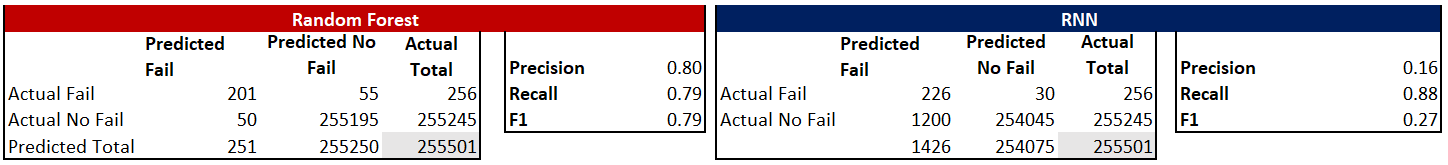


Without any action, Uncle Steve incurrs a cost of CAD 300,000 each month. If we annualize it, then it becomes CAD3,600,000, which is a big amount. The assumption here is that 15 days out 30 days in a month, a turbine break fails (one breaks/fails every couple of days).

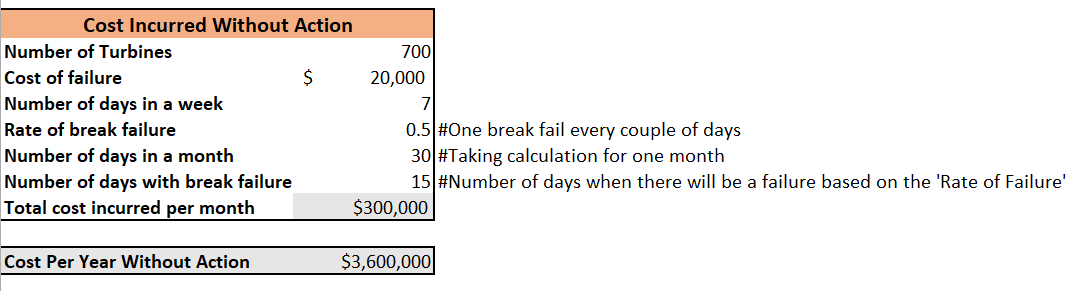

Uncle Steve should use Random Forest as it will result in saving CAD 137,500 more compared to what he will save when using RNN model for prediction. The Annual Cost of Maintenance Incurred by Uncle Steve when using Random Forest model will be CAD 1,627,494, while RNN model will result in annual cost of $1,764,993. The higher cost in RNN model is due to the fact that it has low precision, as a result it has higher False Positive instances because of which the cost incurred for investigation gets increased.

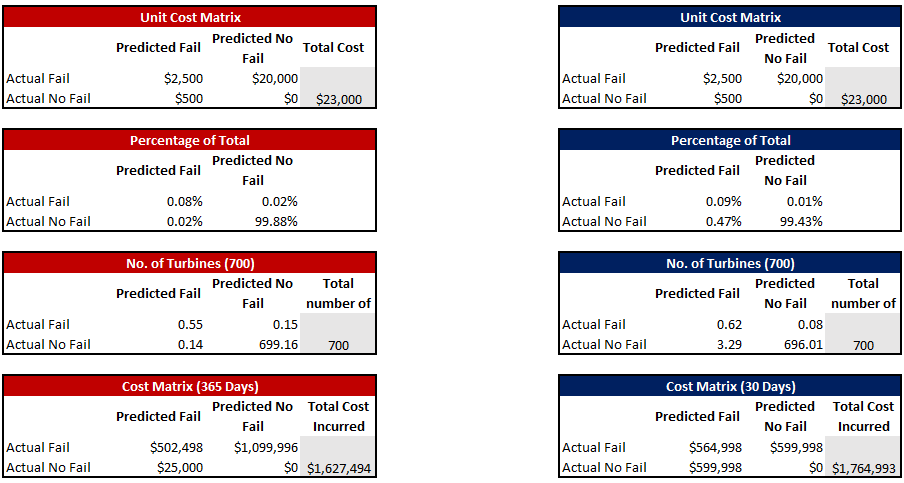